In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import StratifiedKFold, cross_val_score,train_test_split 
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_rows',500)
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
#read dataset provided.
cc=pd.read_csv('concrete.csv')
cc.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
#no of coulmns and rows
cc.shape

(1030, 9)

In [4]:
print("The dataframe has {} rows and {} columns".format(cc.shape[0],cc.shape[1]))

The dataframe has 1030 rows and 9 columns


In [5]:
#coulmn names in the dataset
cc.columns.values

array(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'], dtype=object)

In [6]:
#information regarding each coulmn
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
#display 5 point summary of dataframe
cc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


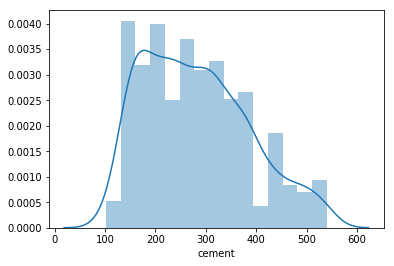

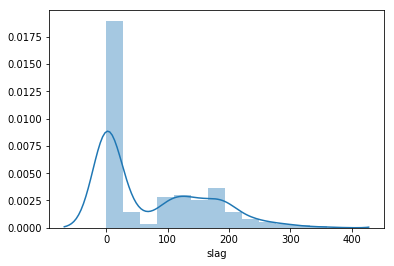

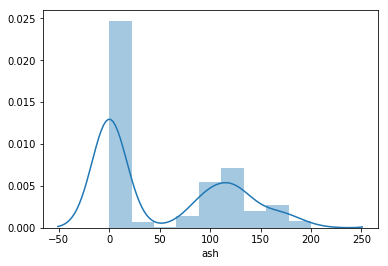

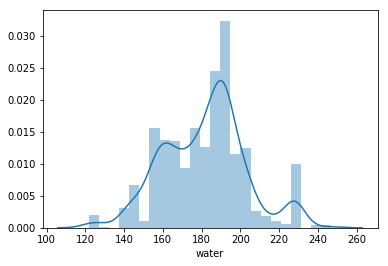

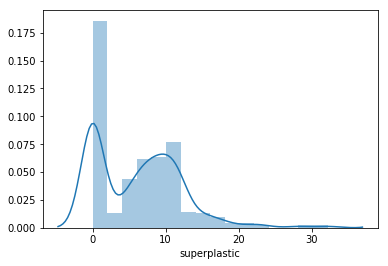

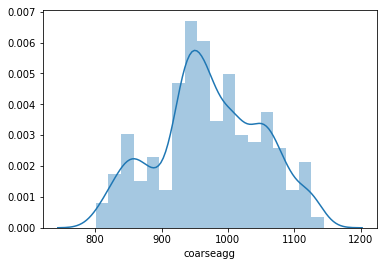

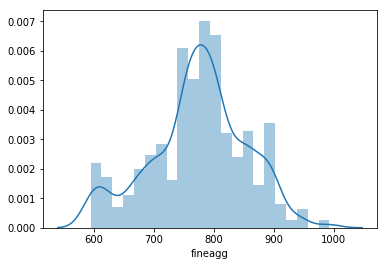

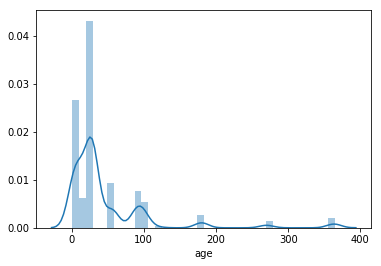

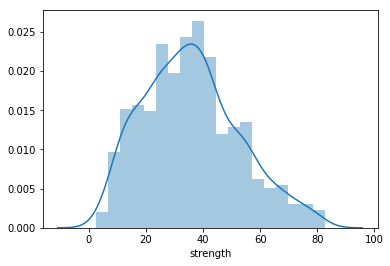

In [8]:
#Distribution of each coulmns.
for i in cc.columns:
    sns.distplot(cc[i])
    plt.show()

In [9]:
#Check if there are any missing or null values.
cc.isnull().sum()


cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

# Outlier Treatment

In [10]:
#We calculate the outliers in each columns.
q1=cc.quantile(0.25)
q3=cc.quantile(0.75)
IQR=q3-q1
cwo=((cc.iloc[:] <(q1-1.5*IQR))|(cc.iloc[:]>(q3+1.5*IQR))).sum(axis=0)
opdf=pd.DataFrame(cwo,index=cc.columns,columns=['No. of Outliers'])
opdf['Percentage Outliers']=round(opdf['No. of Outliers']*100/len(cc),2)
opdf

,No. of Outliers,Percentage Outliers
cement,0,0.00
slag,2,0.19
ash,0,0.00
water,9,0.87
superplastic,10,0.97
coarseagg,0,0.00
fineagg,5,0.49
age,59,5.73
strength,4,0.39


Outliers in Cement column

Text(0.5, 1.0, 'Box Plot')

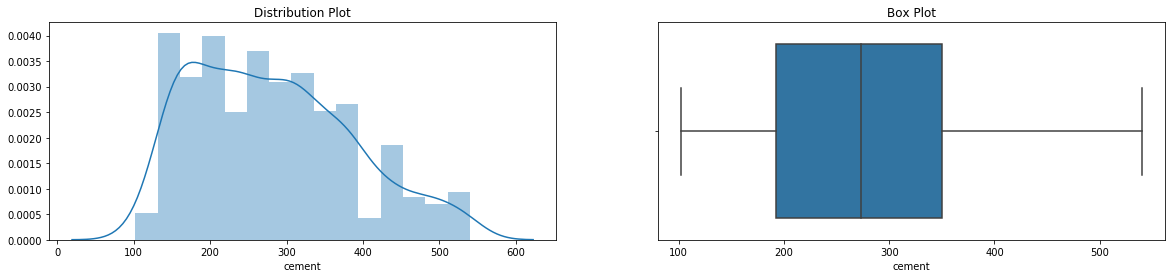

In [11]:

fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(cc['cement'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(cc['cement'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in cement column.

Outliers in Slag coulumn. 

Text(0.5, 1.0, 'Box Plot')

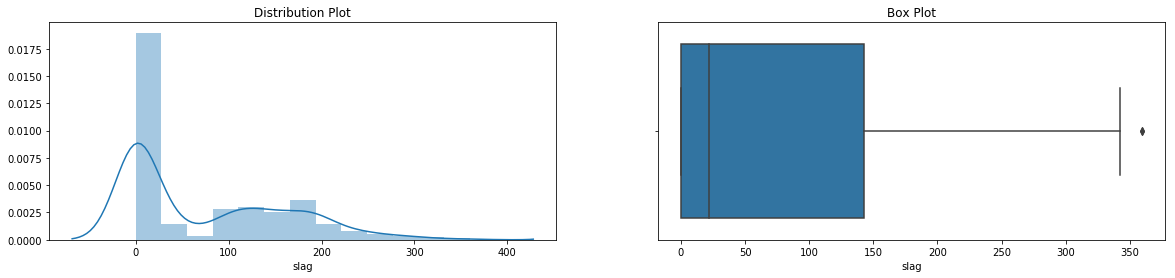

In [12]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(cc['slag'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(cc['slag'],ax=ax2)
ax2.set_title("Box Plot")

Few outliers can be seen in slag coulumn.

In [13]:
up_whisk=cc["slag"].quantile(0.75)+1.5*(cc["slag"].quantile(0.75) - cc["slag"].quantile(0.25))

for i in cc['slag']:
    if(i > up_whisk):
        cc['slag']=cc['slag'].replace(i,up_whisk)


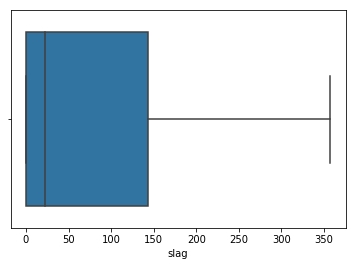

In [14]:
sns.boxplot(x='slag',data=cc)

Outliers in ash coulum 

Text(0.5, 1.0, 'Box Plot')

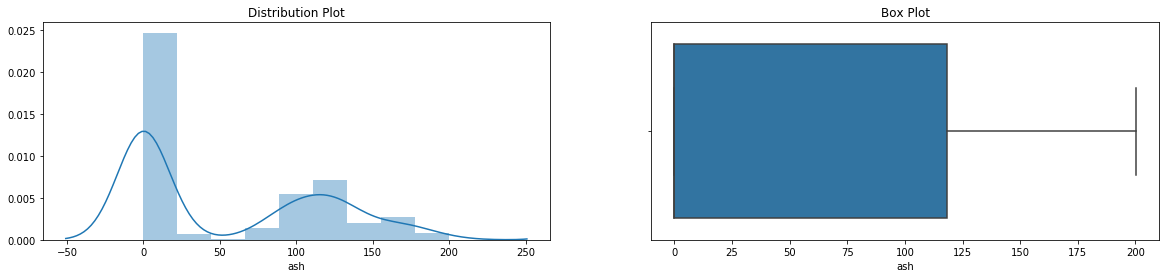

In [15]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(cc['ash'],ax=ax1)

ax1.set_title("Distribution Plot")

sns.boxplot(cc['ash'],ax=ax2)
ax2.set_title("Box Plot")

There are no out liers in ash coulumn.

Outliers in Water coulumn.

Text(0.5, 1.0, 'Box Plot')

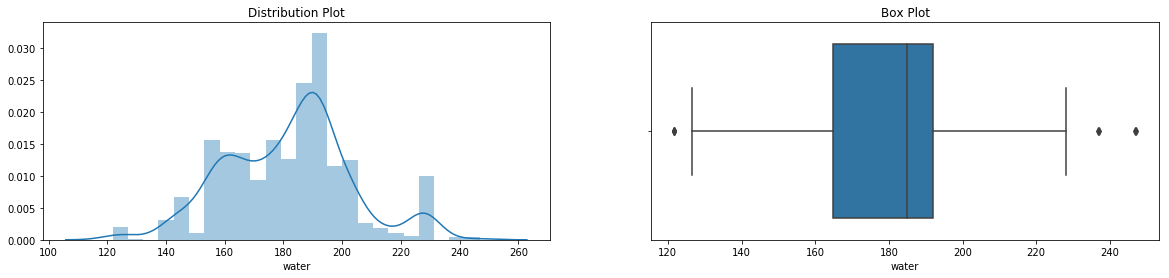

In [16]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(cc['water'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(cc['water'],ax=ax2)
ax2.set_title("Box Plot")

In [17]:
Q1 = cc.quantile(0.25)
Q3 = cc.quantile(0.75)
IQR=Q3-Q1 
IQR=Q3-Q1
cc=cc[~((cc < (q1 - 1.5 * IQR)) |(cc > (q3 + 1.5 * IQR))).any(axis=1)]

Few outliers are present in Water column. 

In [18]:
up_whisk=cc["water"].quantile(0.75)+1.5*(cc["water"].quantile(0.75) - cc["water"].quantile(0.25))

for i in cc['water']:
    if(i > up_whisk):
        cc['water']=cc['water'].replace(i,up_whisk)


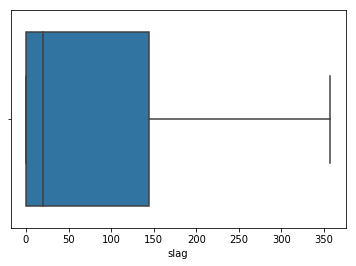

In [19]:
sns.boxplot(x='slag',data=cc)

Outliers in water coulumn are removed


Outliers in superplastic

Text(0.5, 1.0, 'Box Plot')

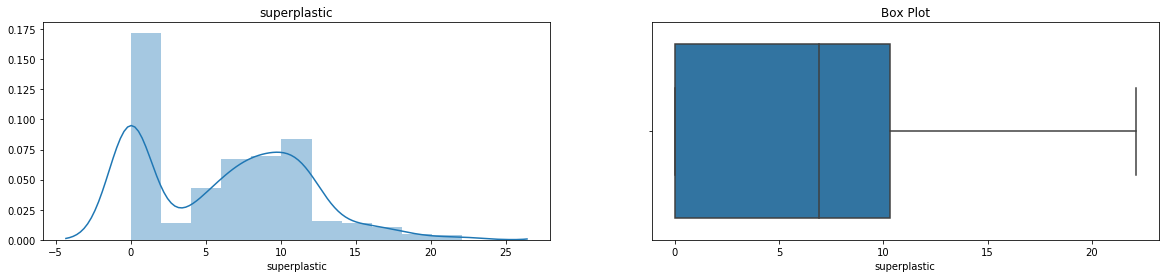

In [20]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(cc['superplastic'],ax=ax1)
ax1.set_title("superplastic")
sns.boxplot(cc['superplastic'],ax=ax2)
ax2.set_title("Box Plot")

There are many outliers in superplastic coulmn

In [21]:
up_whisk=cc["superplastic"].quantile(0.75)+1.5*(cc["superplastic"].quantile(0.75) - cc["slag"].quantile(0.25))

for i in cc['superplastic']:
    if(i > up_whisk):
        cc['superplastic']=cc['superplastic'].replace(i,up_whisk)

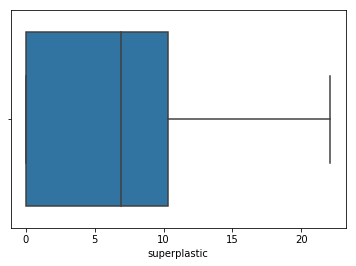

In [22]:
sns.boxplot(x='superplastic',data=cc)


Removed outliers in Superplastic column.

Outliers in coarseagg

Text(0.5, 1.0, 'Box Plot')

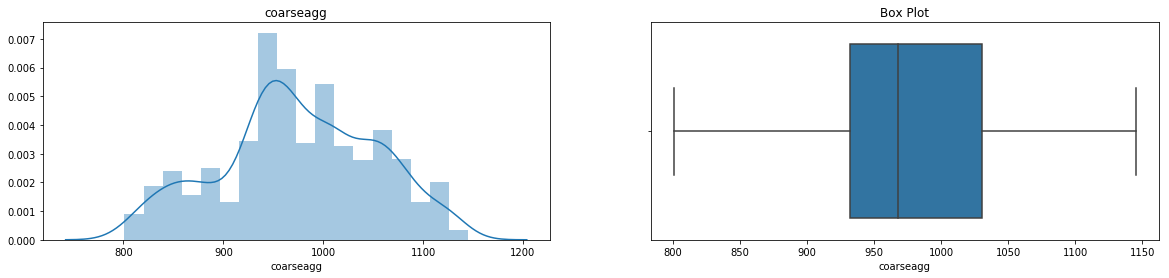

In [23]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(cc['coarseagg'],ax=ax1)
ax1.set_title("coarseagg")

sns.boxplot(cc['coarseagg'],ax=ax2)
ax2.set_title("Box Plot")

No Outliers

Outliers in fineagg


Text(0.5, 1.0, 'Box Plot')

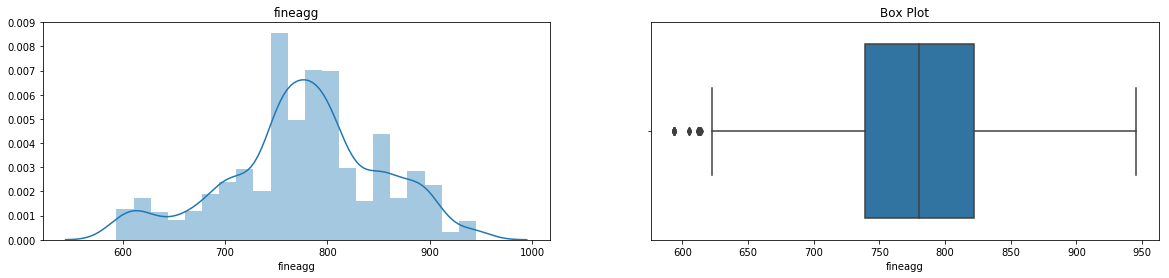

In [24]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(cc['fineagg'],ax=ax1)
ax1.set_title("fineagg")

sns.boxplot(cc['fineagg'],ax=ax2)
ax2.set_title("Box Plot")

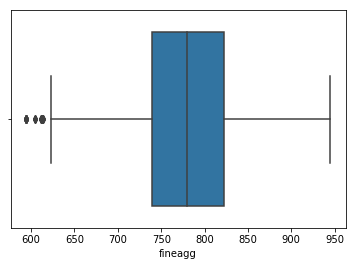

In [25]:
up_whisk=cc["fineagg"].quantile(0.75)+1.5*(cc["fineagg"].quantile(0.75) - cc["fineagg"].quantile(0.25))

for i in cc['fineagg']:
    if(i > up_whisk):
        cc['fineagg']=cc['fineagg'].replace(i,up_whisk)
sns.boxplot(x='fineagg',data=cc)
        

Outliers in age

Text(0.5, 1.0, 'Box Plot')

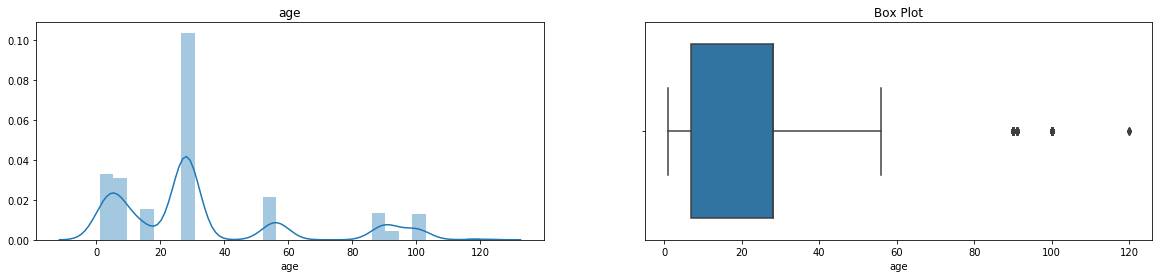

In [26]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(cc['age'],ax=ax1)
ax1.set_title("age")

sns.boxplot(cc['age'],ax=ax2)
ax2.set_title("Box Plot")

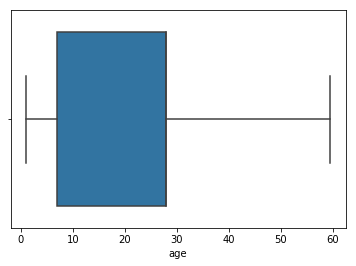

In [27]:
up_whisk=cc["age"].quantile(0.75)+1.5*(cc["age"].quantile(0.75) - cc["age"].quantile(0.25))

for i in cc['age']:
    if(i > up_whisk):
        cc['age']=cc['age'].replace(i,up_whisk)
sns.boxplot(x='age',data=cc)
        

There are no outliers in age column now.

Outliers in Strength 


Text(0.5, 1.0, 'Box Plot')

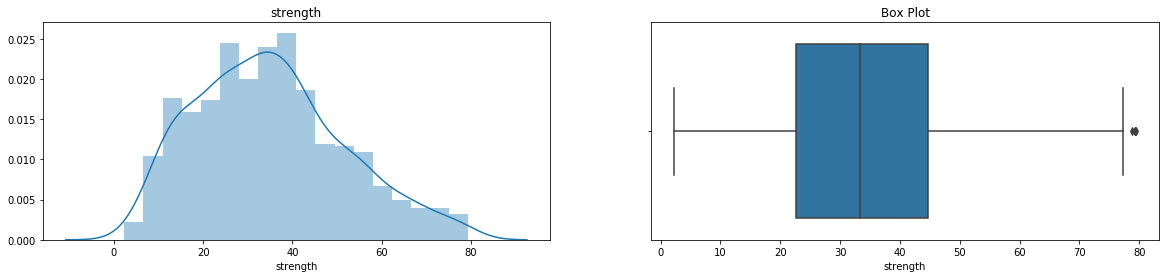

In [28]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(cc['strength'],ax=ax1)
ax1.set_title("strength")

sns.boxplot(cc['strength'],ax=ax2)
ax2.set_title("Box Plot")

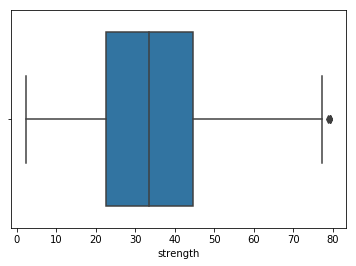

In [29]:
up_whisk=cc["strength"].quantile(0.75)+1.5*(cc["strength"].quantile(0.75) - cc["strength"].quantile(0.25))

for i in cc['strength']:
    if(i > up_whisk):
        cc['age']=cc['strength'].replace(i,up_whisk)
sns.boxplot(x='strength',data=cc)

Thus we can see all outliers have been treated and removed by using IQR.


Surface plot for variables

    X - Axis = columns encoded as [ coarse_agg : 1, fine_agg : 2 , cement : 3 , fly_ash : 4 , water : 5 , furnace_slag:6,super_plasticizer : 7 , compressive_strength : 8 , age : 9]
    Y - Axis = index.
    Z - Axis = values .



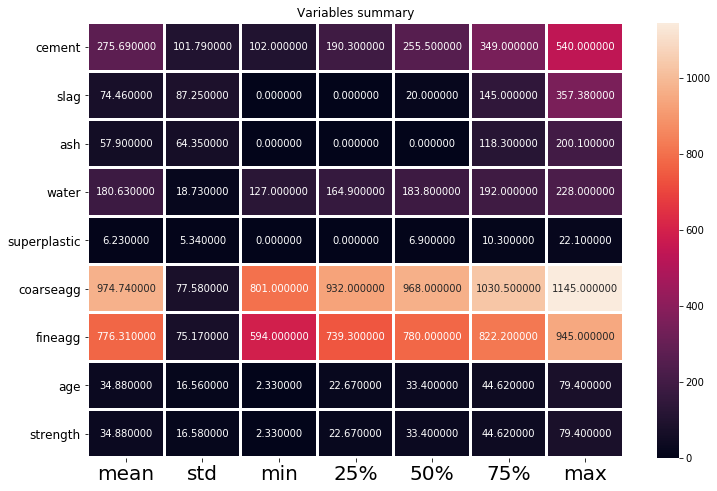

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(round(cc.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()



# Ingredients Distribution

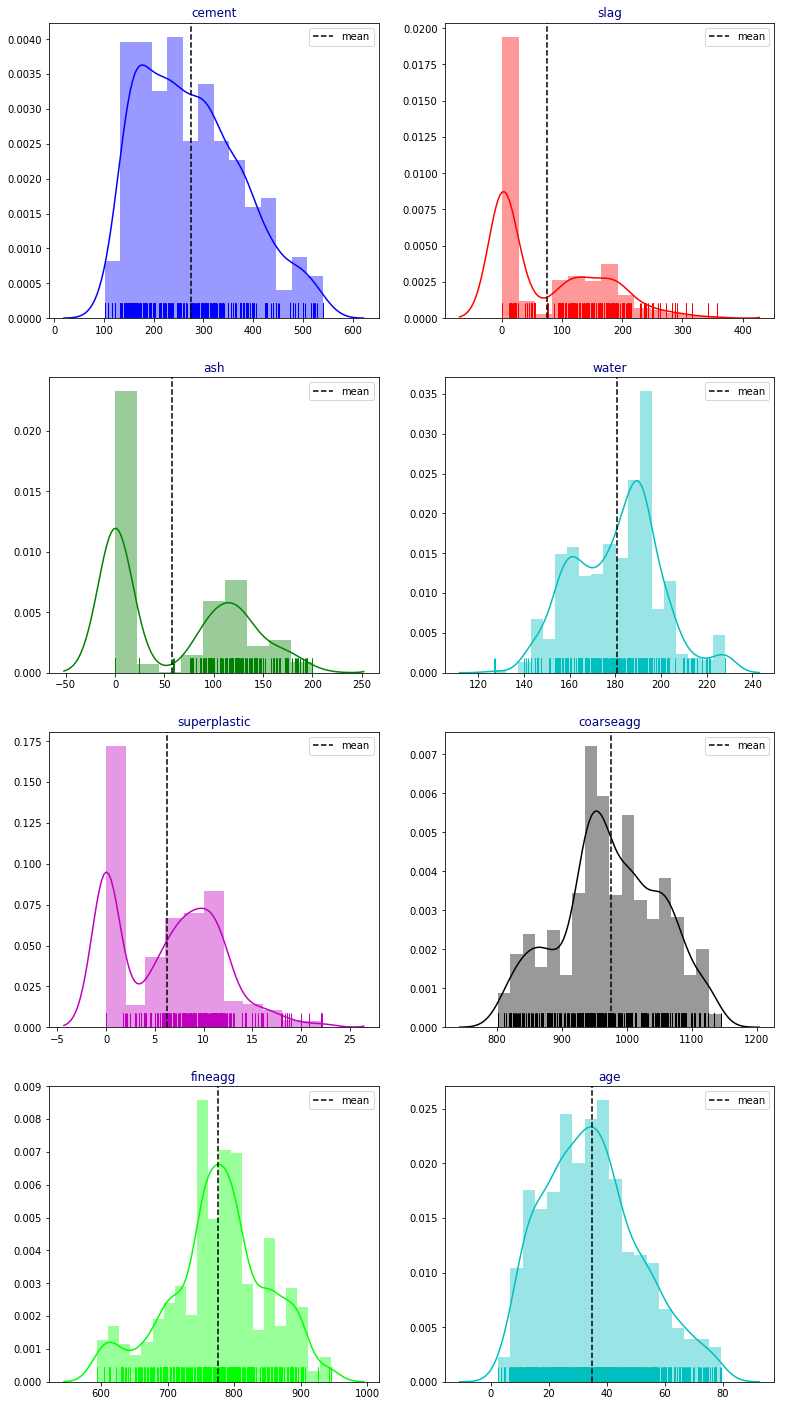

In [31]:
import itertools
cols = [i for i in cc.columns if i not in 'compressive_strength']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(cc[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(cc[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

# Strength distribution

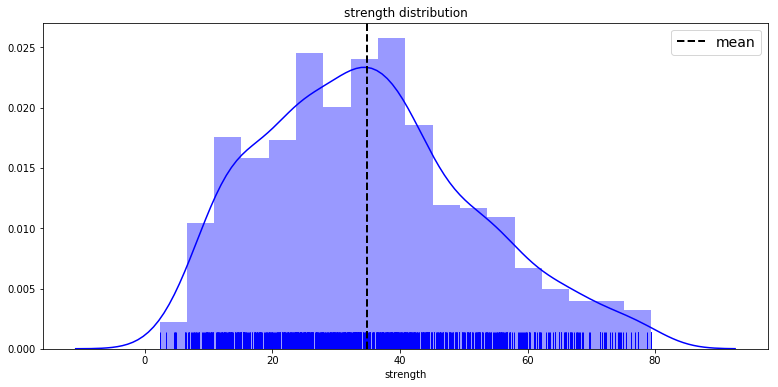

In [32]:
plt.figure(figsize=(13,6))
sns.distplot(cc["strength"],color="b",rug=True)
plt.axvline(cc["strength"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("strength distribution")
plt.show()

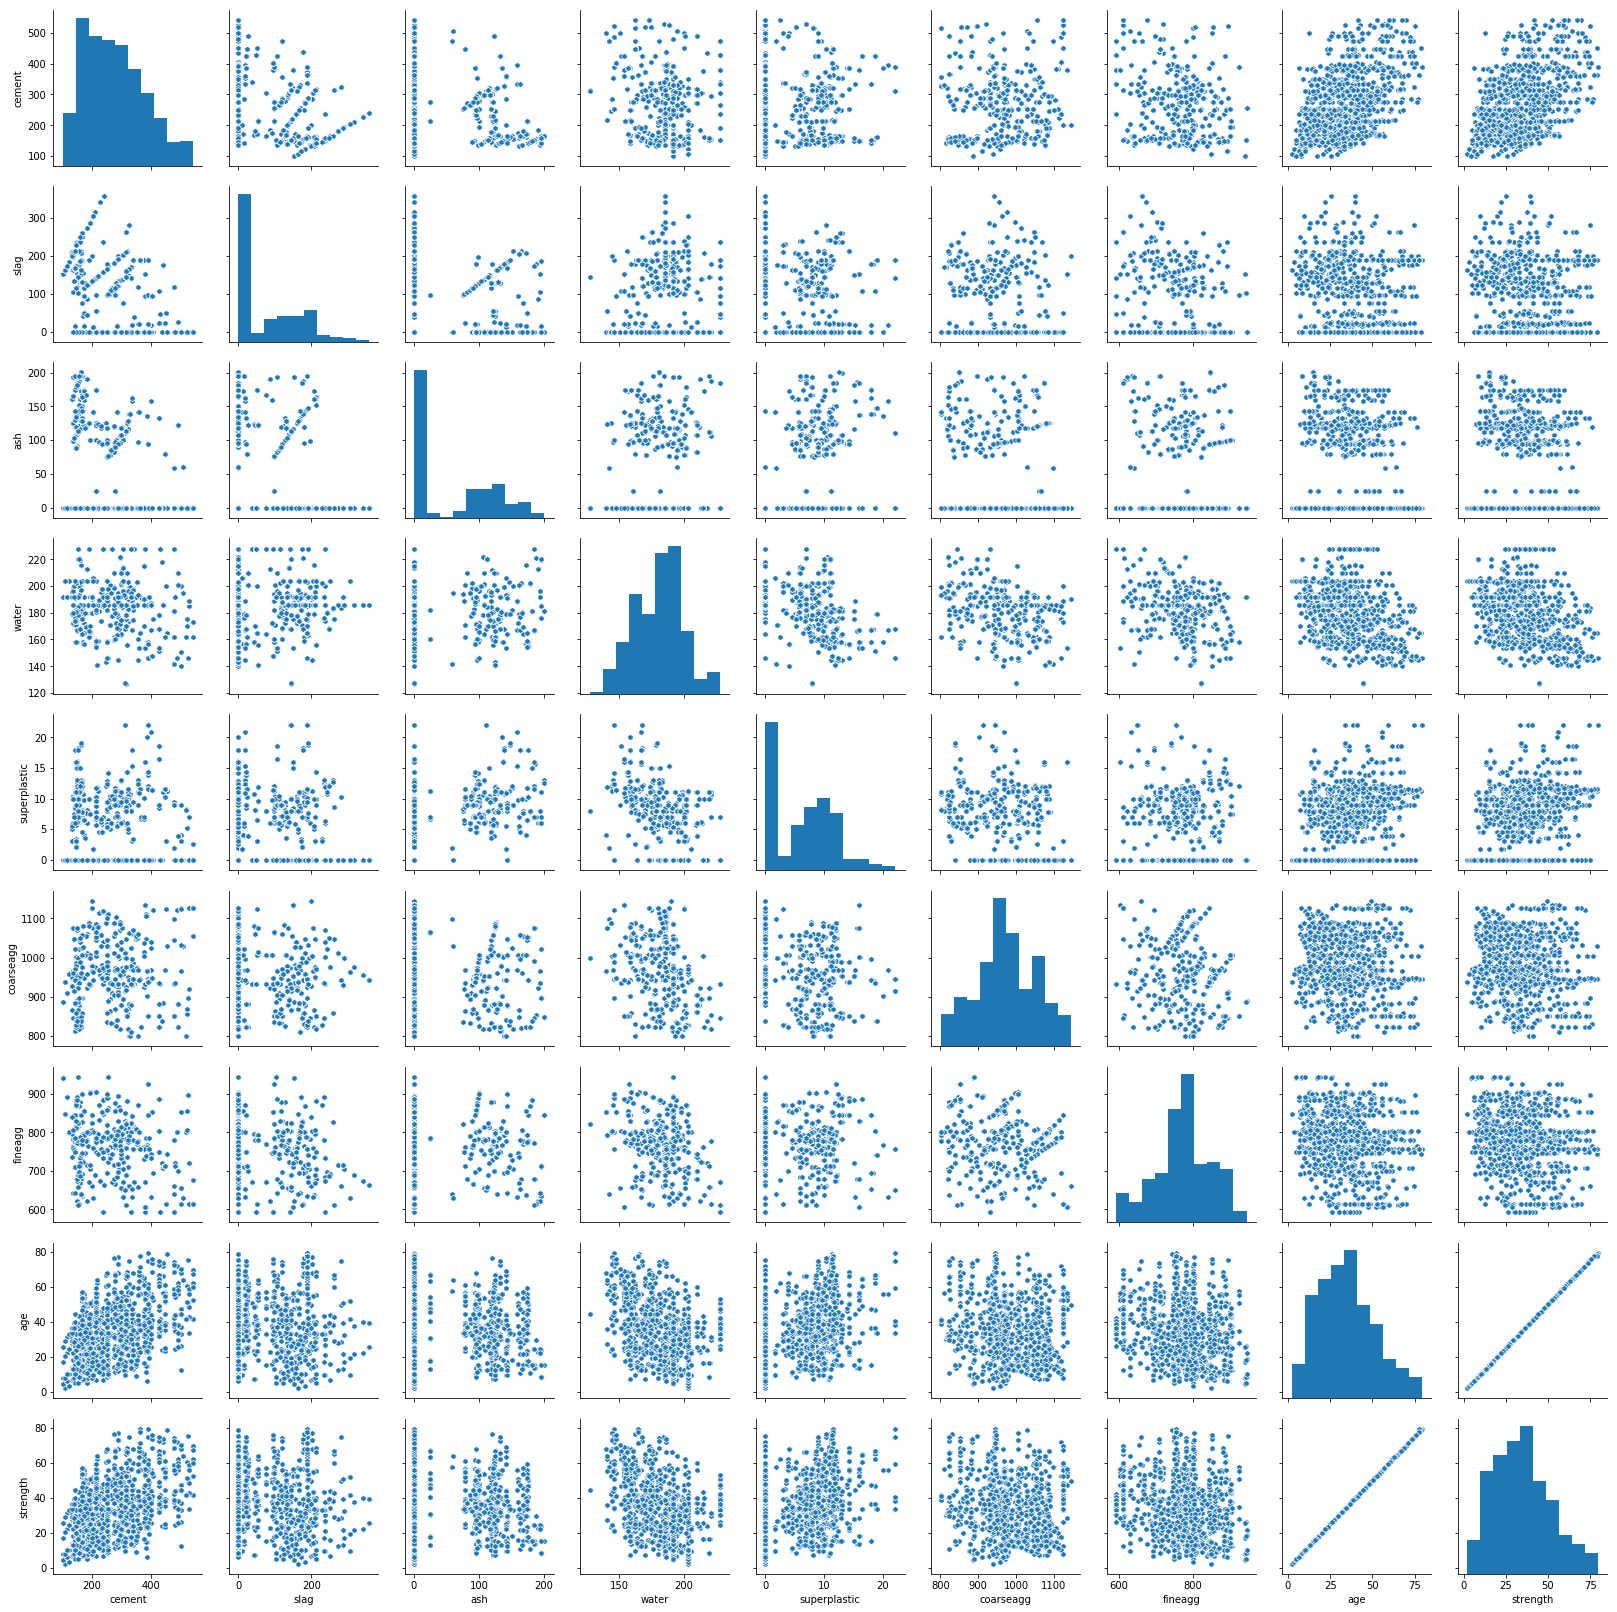

In [33]:
sns.pairplot(cc,markers="h")
plt.show()

# Contour plot between ingredients and strength¶

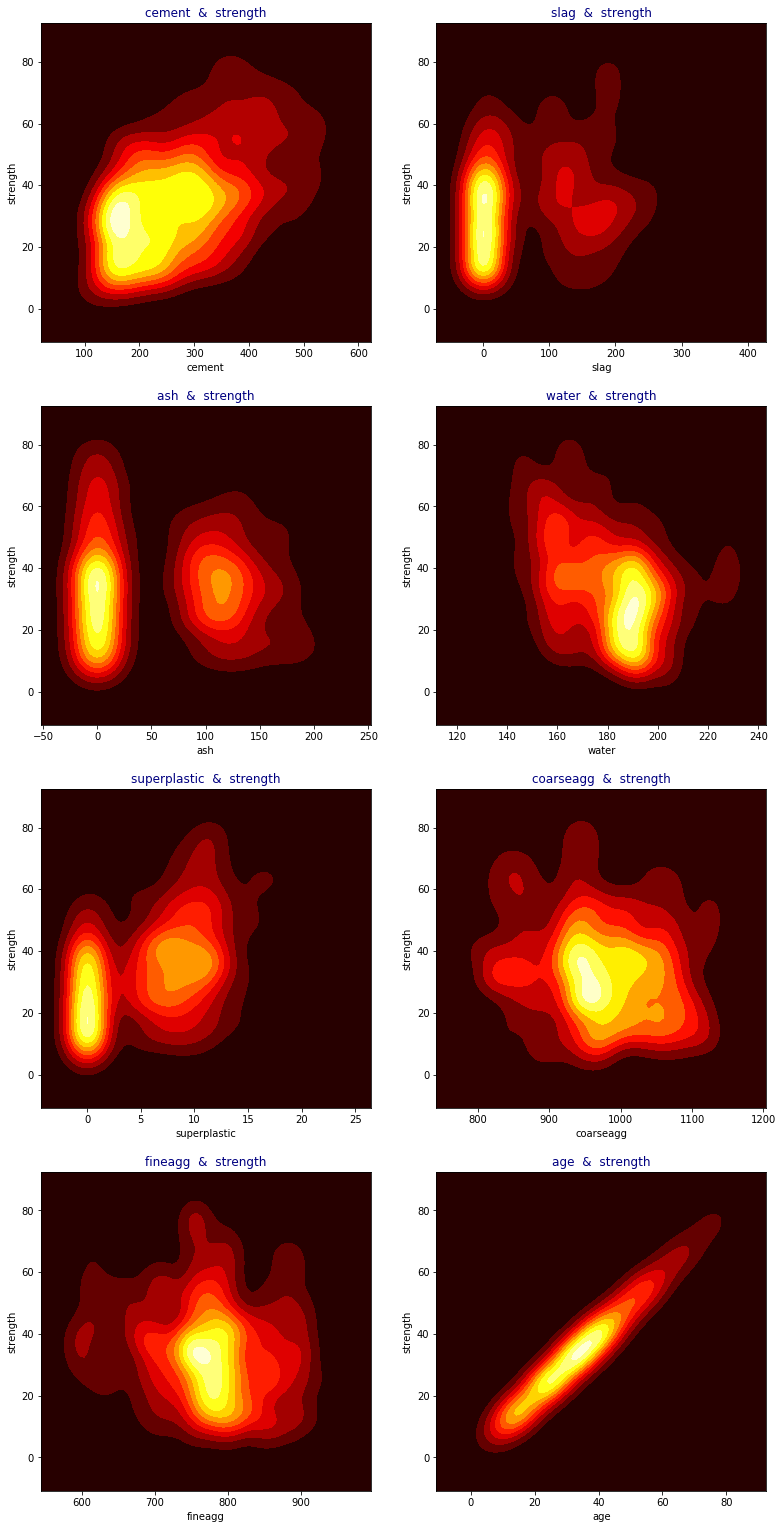

In [34]:
cols = [i for i in cc.columns if i not in 'strength']
length = len(cols)

plt.figure(figsize=(13,27))
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(4,2,j+1)
    sns.kdeplot(cc[i],
                cc["strength"],
                cmap="hot",
                shade=True)
    plt.title(i+"  &  strength",color="navy")



# Correlation between variables


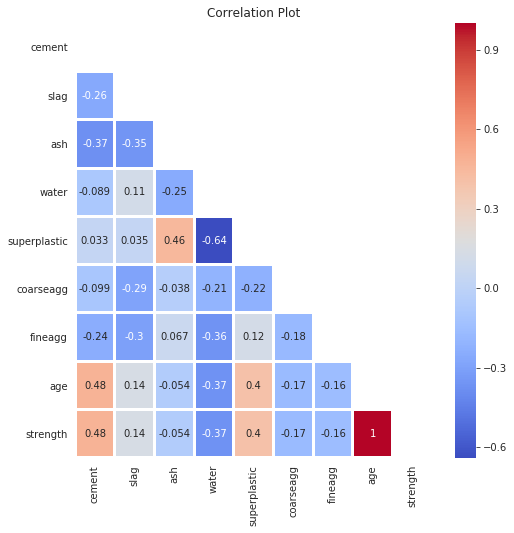

In [35]:
cp = cc.corr()
mask = np.zeros_like(cp)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8,8))
with sns.axes_style("white"):
    sns.heatmap(cp,annot=True,linewidth=2,mask = mask,cmap="coolwarm")
plt.title("Correlation Plot")
plt.show()

None of the features are highly inter correlated or correlated with the target variable.

# Age distribution in months


In [36]:
#Binning days to months
def label(cc):
    if cc["age"] <= 30:
        return "1 month"
    if cc["age"] > 30 and cc["age"] <= 60 :
        return "2 months"
    if cc["age"] > 60 and cc["age"] <= 90 :
        return "3 months"
    if cc["age"] > 90 and cc["age"] <= 120 :
        return "4 months"
    if cc["age"] > 120 and cc["age"] <= 150 :
        return "5 months"
    if cc["age"] > 150 and cc["age"] <= 180 :
        return "6 months"
    if cc["age"] > 180 and cc["age"] <= 210 :
        return "7 months"
    if cc["age"] > 210 and cc["age"] <= 240 :
        return "8 months"
    if cc["age"] > 240 and cc["age"] <= 270 :
        return "9 months"
    if cc["age"] > 270 and cc["age"] <= 300 :
        return "10 months"
    if cc["age"] > 300 and cc["age"] <= 330 :
        return "11 months"
    if cc["age"] > 330 :
        return "12 months"
cc["age_months"] = cc.apply(lambda cc:label(cc) , axis=1)

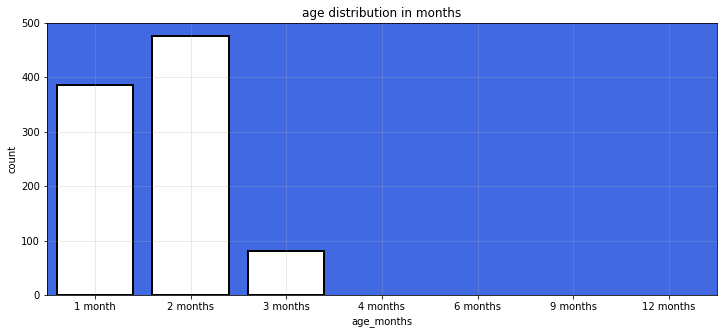

In [37]:
plt.figure(figsize=(12,5))
order = ['1 month','2 months', '3 months','4 months','6 months','9 months', '12 months']
ax = sns.countplot(cc["age_months"],
                   order=order,linewidth=2,
                   edgecolor = "k"*len(order),
                   palette=["w"])
ax.set_facecolor("royalblue")
plt.title("age distribution in months")
plt.grid(True,alpha=.3)
plt.show()

# Models

In [38]:
import statsmodels.api as sm
X=cc.iloc[:,:8]
Y=cc.iloc[:,8]

In [39]:
ls=sm.OLS(Y,sm.add_constant(X))
results=ls.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               strength   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.571e+06
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:14:56   Log-Likelihood:                 729.26
No. Observations:                 943   AIC:                            -1441.
Df Residuals:                     934   BIC:                            -1397.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4046      0.314     -1.289      0.198      -1.021       0.212
cement        4.695e-05      0.000      0.455      0.649      -0.000       0.000
slag             0.0002      0.000      1.261      0.208   -8.41e-05       0.000
ash           1.842e-06      0.000      0.013      0.990      -0.000       0.000
water            0.0005      0.000      1.105      0.270      -0.000       0.002
superplastic     0.0012      0.001      1.000      0.318      -0.001       0.004
coarseagg        0.0001      0.000      1.202      0.230   -8.32e-05       0.000
fineagg          0.0001      0.000      1.159      0.247      -0.000       0.000
age              1.0012      0.000   3263.868      0.000       1.001       1.002
==============================================================================
Omnibus:                     1830.170   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1835331.462
Skew:                          14.427   Prob(JB):                         0.00
Kurtosis:                     217.191   Cond. No.                     1.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here we can see that the constant term is having P value greater than 0.05 viz. the assumed level of significance, thus we remove the constant term from modelling

# Linear Regression - OLS

In [40]:
ls=sm.OLS(Y,X)
results=ls.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               strength   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.395e+07
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:14:56   Log-Likelihood:                 728.42
No. Observations:                 943   AIC:                            -1441.
Df Residuals:                     935   BIC:                            -1402.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cement       -6.242e-05   5.86e-05     -1.066      0.287      -0.000    5.25e-05
slag          2.141e-05   6.51e-05      0.329      0.742      -0.000       0.000
ash             -0.0001   9.47e-05     -1.487      0.137      -0.000    4.51e-05
water        -3.427e-05      0.000     -0.169      0.865      -0.000       0.000
superplastic     0.0006      0.001      0.570      0.569      -0.002       0.003
coarseagg    -2.268e-06   3.46e-05     -0.066      0.948   -7.01e-05    6.56e-05
fineagg      -7.208e-06   4.13e-05     -0.174      0.862   -8.83e-05    7.39e-05
age              1.0012      0.000   3262.803      0.000       1.001       1.002
==============================================================================
Omnibus:                     1832.605   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1849021.349
Skew:                          14.468   Prob(JB):                         0.00
Kurtosis:                     217.992   Cond. No.                         397.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Splitting train and test data

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state=150, test_size=0.3 )

# SKLEARN - Linear Regression


In [43]:
lr=LinearRegression()
lr.fit(X_train,y_train)
print('Score: ',lr.score(X_train,y_train))
y_pred_lrtr=lr.predict(X_train)
y_pred_lrte=lr.predict(X_test)
from sklearn.metrics import r2_score
print('Train R2 score: ',r2_score(y_train,y_pred_lrtr))
print('Test R2 score: ',r2_score(y_test,y_pred_lrte))

Score:  0.9999669633968521
Train R2 score:  0.9999669633968521
Test R2 score:  0.9999257081708726


# Polynomial Regression - Degree 2


In [44]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 2)
X_polytr = pf.fit_transform(X_train)
lr.fit(X_polytr,y_train)
y_pred_lr2tr = lr.predict(X_polytr)
print("Training R2 - degree 2 polynomial: ",r2_score(y_train, y_pred_lr2tr ))
X_polyte = pf.fit_transform(X_test)
y_pred_lr2te= lr.predict(X_polyte)
print("Test R2 - degree 2 polynomial: ",r2_score(y_test,y_pred_lr2te))

Training R2 - degree 2 polynomial:  0.9999694532037545
Test R2 - degree 2 polynomial:  0.9999335245671677


# Polynomial Regression - Degree 3


In [45]:
pf = PolynomialFeatures(degree = 3)
X_polytr = pf.fit_transform(X_train)
lr.fit(X_polytr,y_train)
y_pred_lr2tr = lr.predict(X_polytr)
print("Training R2 - degree 2 polynomial: ",r2_score(y_train, y_pred_lr2tr ))
X_polyte = pf.fit_transform(X_test)
y_pred_lr2te= lr.predict(X_polyte)
print("Test R2 - degree 2 polynomial: ",r2_score(y_test,y_pred_lr2te))

Training R2 - degree 2 polynomial:  0.9999753866546478
Test R2 - degree 2 polynomial:  0.9999385899858466


# Polynomial Regression - Degree 4

In [46]:
pf = PolynomialFeatures(degree = 4)
X_polytr = pf.fit_transform(X_train)
lr.fit(X_polytr,y_train)
y_pred_lr2tr = lr.predict(X_polytr)
print("Training R2 - degree 2 polynomial: ",r2_score(y_train, y_pred_lr2tr ))
X_polyte = pf.fit_transform(X_test)
y_pred_lr2te= lr.predict(X_polyte)
print("Test R2 - degree 2 polynomial: ",r2_score(y_test,y_pred_lr2te))

Training R2 - degree 2 polynomial:  0.9999815191912816
Test R2 - degree 2 polynomial:  0.936690152587117


Beyond this, the model does not perform well. From this it is clear that the model is non linear. Thus we proceed to other non-linear models.



# Decision Tree Regressor

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
y_pred_dttr=dt.predict(X_train)
y_pred_dtte=dt.predict(X_test)
print('Train R2 score: ',r2_score(y_train,y_pred_dttr))
print('Test R2 score: ',r2_score(y_test,y_pred_dtte))

Train R2 score:  1.0
Test R2 score:  0.9997933449744933


The fully grown tree is overfitting. This can be controlled by pruning the tree. Using grid search we find the optimum depth and the impurity criterion and other hyper parameters.



In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': np.arange(3, 8),
             'criterion' : ['mse','mae'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

grid_tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5, scoring= 'r2')
grid_tree.fit(X_train, y_train)
print(grid_tree.best_estimator_)
print(np.abs(grid_tree.best_score_))

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=100, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
0.9996659894211136


In [50]:
dtpr=DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=100, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
dtpr.fit(X_train,y_train)
dtpr.score(X_train,y_train)
y_pred_dtprtr=dtpr.predict(X_train)
y_pred_dtprte=dtpr.predict(X_test)
print('Train R2 score: ',r2_score(y_train,y_pred_dtprtr))
print('Test R2 score: ',r2_score(y_test,y_pred_dtprte))

Train R2 score:  0.9997484053737331
Test R2 score:  0.9995972613887151


It's severely overfit even now. We still have to prune it.

In [51]:
param_grid = {'max_depth': np.arange(3, 6),
             'criterion' : ['mse','mae'],
             'max_leaf_nodes': [100,105, 90,95],
             'min_samples_split': [6,7,8,9,10],
             'max_features':[2,3,4,5,6]}

grid_tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5, scoring= 'r2')
grid_tree.fit(X_train, y_train)
print(grid_tree.best_estimator_)
print(np.abs(grid_tree.best_score_))

DecisionTreeRegressor(criterion='mae', max_depth=5, max_features=6,
                      max_leaf_nodes=100, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
0.9895082432645547


In [52]:
dtpr=DecisionTreeRegressor(criterion='mae', max_depth=5, max_features=6,
                      max_leaf_nodes=95, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
dtpr.fit(X_train,y_train)
dtpr.score(X_train,y_train)
y_pred_dtprtr=dtpr.predict(X_train)
y_pred_dtprte=dtpr.predict(X_test)
print('Train R2 score: ',r2_score(y_train,y_pred_dtprtr))
print('Test R2 score: ',r2_score(y_test,y_pred_dtprte))

Train R2 score:  0.9961368086126308
Test R2 score:  0.9933631352425216


The overfit has reduced but the model performance has nt imporoved on the test data. So we now move onto other models.

# AdaBoost Regressor

In [53]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(random_state=0, n_estimators=100)
abr.fit(X_train, y_train)
abr.feature_importances_  
abr.fit(X_train,y_train)
abr.score(X_train,y_train)
y_pred_abrtr=abr.predict(X_train)
y_pred_abrte=abr.predict(X_test)
print('Train R2 score: ',r2_score(y_train,y_pred_abrtr))
print('Test R2 score: ',r2_score(y_test,y_pred_abrte))

Train R2 score:  0.9963123867905223
Test R2 score:  0.9961295369532823


Adaboost has reduced the variance and improved the model performance as well.



# RandomForest Regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr.score(X_train,y_train)
y_pred_rfrtr=rfr.predict(X_train)
y_pred_rfrte=rfr.predict(X_test)
print('Train R2 score: ',r2_score(y_train,y_pred_rfrtr))
print('Test R2 score: ',r2_score(y_test,y_pred_rfrte))

Train R2 score:  0.9999592832555926
Test R2 score:  0.9998749207611558


The random forest is overfitting but has improved the model performance. So we now tune the hyper parameters to reduce the overfit.

In [55]:
param_grid = {'max_depth': np.arange(3, 8),
             'criterion' : ['mse','mae'],
             'max_leaf_nodes': [100,105, 90,95],
             'min_samples_split': [6,7,8,9,10],
             'max_features':['auto','sqrt','log2']}

grid_tree = GridSearchCV(RandomForestRegressor(), param_grid, cv = 5, scoring= 'r2')
grid_tree.fit(X_train, y_train)
print(grid_tree.best_estimator_)
print(np.abs(grid_tree.best_score_))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=90,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=6,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
0.9997369064656871


# Gradient Boosting

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)
gb.score(X_train,y_train)
y_pred_gbtr=gb.predict(X_train)
y_pred_gbte=gb.predict(X_test)
print('Train R2 score: ',r2_score(y_train,y_pred_gbtr))
print('Test R2 score: ',r2_score(y_test,y_pred_gbte))

Train R2 score:  0.9999602313926226
Test R2 score:  0.9998801604691298


In [61]:
param_grid = {'n_estimators': [230],
              'max_depth': range(10,31,2), 
              'min_samples_split': range(50,501,10), 
              'learning_rate':[0.2]}
clf = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=5).fit(X_train, y_train)
print(clf.best_estimator_) 
print("R Squared:",clf.best_score_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.2, loss='ls', max_depth=28,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=50,
                          min_weight_fraction_leaf=0.0, n_estimators=230,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)
R Squared: 0.999859317518655


In [62]:


gb=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.2, loss='ls', max_depth=14,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=150,
                          min_weight_fraction_leaf=0.0, n_estimators=230,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)
gb.fit(X_train,y_train)
gb.score(X_train,y_train)
y_pred_gbtr=gb.predict(X_train)
y_pred_gbte=gb.predict(X_test)
print('Train R2 score: ',r2_score(y_train,y_pred_gbtr))
print('Test R2 score: ',r2_score(y_test,y_pred_gbte))



Train R2 score:  0.9999979809279593
Test R2 score:  0.9998076605181668


This model is slightly overfit but here we have achieved a model which performes well with both test and train data.

# XGBoost Regressor

In [63]:
import xgboost
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(X_train,y_train)
print('Model Score: ', xgb.score(X_train,y_train))
y_pred_xgbtr=xgb.predict(X_train)
y_pred_xgbte=xgb.predict(X_test)
print('Train R2-Score: ', r2_score(y_train,y_pred_xgbtr))
print('Test R2-Score: ', r2_score(y_test,y_pred_xgbte))

[15:35:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Score:  0.9999553152451713
Train R2-Score:  0.9999553152451713
Test R2-Score:  0.9998749435789678


In [64]:


xgb=XGBRegressor(base_score=0.7, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=0.65, colsample_bytree=1, gamma=0.3,
             importance_type='weight', learning_rate=0.2, max_delta_step=150,
             max_depth=4, min_child_weight=0.5, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0.001, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgb.fit(X_train,y_train)
print('Model Score: ', xgb.score(X_train,y_train))
y_pred_xgbtr=xgb.predict(X_train)
y_pred_xgbte=xgb.predict(X_test)
print('Train R2-Score: ', r2_score(y_train,y_pred_xgbtr))
print('Test R2-Score: ', r2_score(y_test,y_pred_xgbte))



Model Score:  0.9996349346051261
Train R2-Score:  0.9996349346051261
Test R2-Score:  0.9964108228574099



Here we have achieved a model which performes well with both test and train data. This is very lightly overfit.